## K-Means Clustering
#### Lew Sears

In [45]:
import numpy as np
import pandas as pd

In [158]:
class K_Means_Clustering:
    '''Basic k-means algorithm for cluster analysis. '''
    
    #initialize the hyperparameter k
    def __init__(self, k):
        try:
            if type(k) == int and k >= 1:
                self.k = k
            else:
                raise ValueError('Bad k')
        except ValueError as exp:
            line = "\n-------------------------------------------------\n"
            print("Value Error:{}Given k = {}. Bad choice my friend!{}k must be a nonzero positive integer.{}\
            ".format(line, k, line, line))
    
    
    #Find the best centroids to create labels using iterations. This is a little simpler.
    def fit_iter(self, df, iterations):
        '''Input a scaled np.array with only numerical columns to be assigned labels. For a pandas dataframe,
        just fit StandardScaler and transform the dataframe. Put in the amount of iterations you desire. The
        iterations will stop if the labels do not change.'''
        
        #We will run through this process based on the set ammount of iterations.
        iteration_counter = 0
        while iteration_counter < iterations:
            
            #Initialize centroids
            if iteration_counter == 0:
                #df is scaled so we just want random points normally distibuted around 0
                centroids = np.random.normal(0 , 1, size = (self.k,df.shape[1]))
            #Update centroids
            else:
                centroids = centroids_update


            #Pick the labels
            closest_centroid = []
            for vec in df:
                distances = np.sum((centroids - vec)**2, axis = 1)
                label = np.argmin(distances)
                closest_centroid.append(label)
                
            #Check if any labels have changed
            try:
                if len(np.unique(labels == np.array(closest_centroid))) == 1:
                    self.k_labels = labels
                    line = "\n----------------------------------------------\n"
                    df_count_labels = pd.DataFrame({'Label Counts': 
                                                    np.unique(self.k_labels, return_counts = True)[1]})
                    return print("Convergence Reached. Stopped at iteration {}.{}{}\
                                ".format(iteration_counter, line, df_count_labels))
            except:
                pass
            
            
            labels = np.array(closest_centroid)

            #Now calculate new centroids
            updates = []
            unique_labels = np.unique(labels)
            for some_label in unique_labels:
                some_label_group = df[labels == some_label]
                
                #Find the average
                try: 
                    center = np.sum(some_label_group, axis = 0)/some_label_group.shape[0]
                    
                #This is basically the case where there are no points with this label
                except:
                    center = np.random.normal(0 , 1, size = (5,)) 
                
                updates.append(center)
            centroids_update = np.array(updates)
            self.centroids = centroids_update
            iteration_counter += 1

        self.k_labels = labels
        line = "\n-----------------------\n"
        df_count_labels = pd.DataFrame({'Label Counts': np.unique(self.k_labels, return_counts = True)[1]})
        return print("Reached max iterations.{}{}".format(line,df_count_labels))
    

    #Final k-means model with inertia given
    def fit(self, df):
        '''Input a scaled np.array with only numerical columns to be assigned labels. For a pandas dataframe,
        just fit StandardScaler and transform the dataframe. Put in the amount of iterations you desire. The
        iterations will stop if the labels do not change.'''
        
        #To calculate inertia
        def inertia_function(df, centroid):
            return np.sum(np.sqrt(np.sum((df-centroid)**2, axis = 1)), axis = 0)

        #Find the initial inertia for no clusters
        center = np.sum(df, axis = 0)/df.shape[0]
        
        #initialize centroids
        centroids_update = np.random.normal(0 , 1, size = (self.k,df.shape[1]))
        iteration_counter = 0
        
        while iteration_counter < 200:
            
            centroids = centroids_update

            #Pick the labels
            closest_centroid = []
            for vec in df:
                distances = np.sum((centroids - vec)**2, axis = 1)
                label = np.argmin(distances)
                closest_centroid.append(label)
                
            #Check if any labels have changed
            try:
                if len(np.unique(labels == np.array(closest_centroid))) == 1:
                    self.k_labels = labels
                    line = "\n----------------------------------------------\n"
                    df_count_labels = pd.DataFrame({'Label Counts': 
                                                    np.unique(self.k_labels, return_counts = True)[1]})
                    return print("Convergence Reached. Stopped at iteration {}.{}{}\
                                ".format(iteration_counter, line, df_count_labels))
            except:
                pass
            
            
            labels = np.array(closest_centroid)

            #Now calculate new centroids
            updates = []
            inertia_per_centroid = []
            unique_labels = np.unique(labels)
            for some_label in unique_labels:
                some_label_group = df[labels == some_label]
                
                #Find the average
                try: 
                    center = np.sum(some_label_group, axis = 0)/some_label_group.shape[0]
                    
                #This is basically the case where there are no points with this label
                except:
                    center = np.random.normal(0 , 1, size = (5,))
                
                updates.append(center)
                inertia_per_centroid.append(inertia_function(some_label_group, center))
            
            centroids_update = np.array(updates)
            self.centroids = centroids_update
            self.inertia = sum(inertia_per_centroid)
            iteration_counter += 1

        self.k_labels = labels
        line = "\n-----------------------\n"
        df_count_labels = pd.DataFrame({'Label Counts': np.unique(self.k_labels, return_counts = True)[1]})
        return print("Max Iterations Reached.{}{}{}Inertia: {}".format(line,df_count_labels,line, self.itertia))

#### Let's try an example

In [3]:
sample_df = np.random.normal(0 , 1, size = (1000,2))
sample_df[:5]

array([[ 0.32276289, -0.69894153],
       [ 1.46450639, -0.73557278],
       [-0.93754276,  1.0534983 ],
       [ 1.80915551,  0.78288922],
       [-0.24621287,  0.41291274]])

In [4]:
model = K_Means_Clustering(3)

In [5]:
model.fit(sample_df, 50)

Convergence Reached. Stopped at iteration 20.
----------------------------------------------
   Label Counts
0           358
1           297
2           345                                


In [6]:
model.k_labels[:50]

array([0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 0, 1, 0,
       0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 0,
       2, 0, 0, 1, 0, 2])

Let's try see how it did.

In [7]:
df_plotter = pd.DataFrame(dict(x=sample_df[:,0], y=sample_df[:,1], label=model.k_labels))
groups = df_plotter.groupby('label')
df_plotter.head()

,x,y,label
0,0.322763,-0.698942,0
1,1.464506,-0.735573,0
2,-0.937543,1.053498,2
3,1.809156,0.782889,0
4,-0.246213,0.412913,2


In [8]:
import matplotlib.pyplot as plt

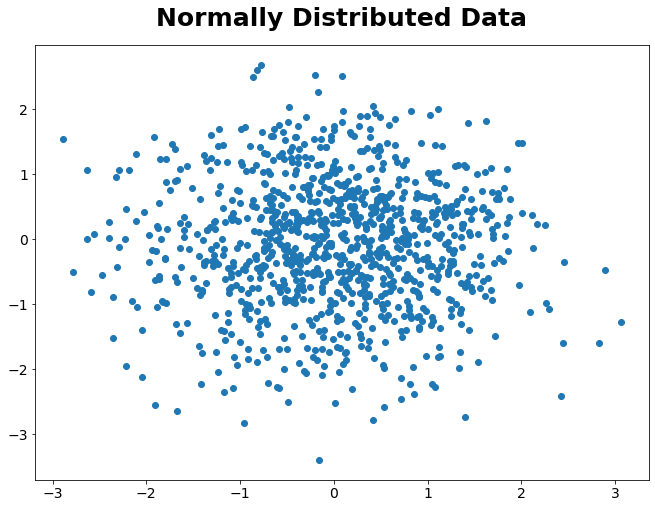

In [9]:
#This should be just completely normally distributed
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)
plt.scatter(df_plotter['x'],df_plotter['y'])
plt.xticks(fontsize = 14)
plt.yticks(fontsize=14)
ax.set_title("Normally Distributed Data",fontsize=25,fontweight = 'bold', y=1.03);

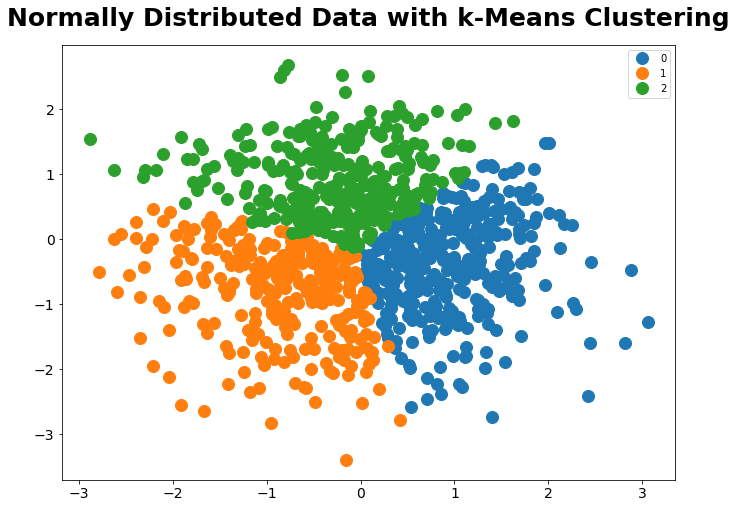

In [10]:
#Let's add labels. It's not the best clustering example but just to check:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.xticks(fontsize = 14)
plt.yticks(fontsize=14)
ax.set_title("Normally Distributed Data with k-Means Clustering",fontsize=25,fontweight = 'bold', y=1.03);

Not bad! You can see that it's working even though this "data set" really doesn't have any clustering in it. So, let's see if it can pick up on groups well.

In [11]:
group_1 = pd.DataFrame(np.random.normal(0 , 1, size = (1000,2)))
group_2 = pd.DataFrame(np.random.normal(0 , 1, size = (1000,2))-4)
group_3 = pd.DataFrame(np.random.normal(0 , 1, size = (1000,2))+4)
df_grouped = pd.concat([group_1,group_2,group_3], axis = 0)
df_grouped_np = np.array(df_grouped)

In [12]:
model = K_Means_Clustering(3)
model.fit(df_grouped_np, 50)

Convergence Reached. Stopped at iteration 4.
----------------------------------------------
   Label Counts
0          1000
1           999
2          1001                                


In [13]:
df_plotter = pd.DataFrame(dict(x=df_grouped_np[:,0], y=df_grouped_np[:,1], label=model.k_labels))
groups = df_plotter.groupby('label')
df_plotter.head()

,x,y,label
0,-0.119837,-0.865336,0
1,0.135808,1.341597,0
2,-1.688882,-0.032831,0
3,0.960278,-0.853769,0
4,-0.042537,0.973497,0


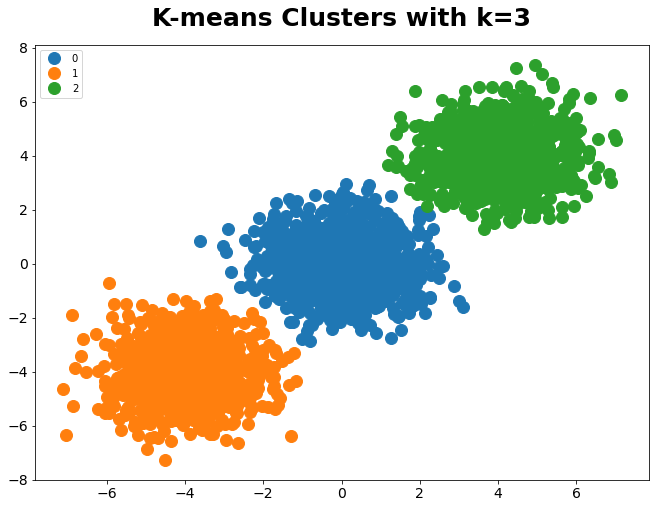

In [14]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.xticks(fontsize = 14)
plt.yticks(fontsize=14)
ax.set_title("K-means Clusters with k=3",fontsize=25,fontweight = 'bold', y=1.03);